In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


Using TensorFlow backend.


from __future__ import print_function read about it https://www.pythonsheets.com/notes/python-future.html

In [2]:
batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
  #https://machinelearningmastery.com/a-gentle-introduction-to-channels-first-and-channels-last-image-formats-for-deep-learning/ to know about image_data_format and what is "channelS_first"
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 #normalizing
x_test /= 255 #normalizing
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


<h3>Category 1: Kernel_size (3,3) without adding dropout and batch normalization </h3> 

2 Hidden Layers

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 64)        73792     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                309770    
Total params: 420,874
Trainable params: 420,874
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 533s 9ms/step - loss: 0.1714 - accuracy: 0.9485 - val_loss: 0.0578 - val_accuracy: 0.9804
Epoch 2/10
60000/60000 [==============================] - 534s 9ms/step - loss: 0.0509 - accuracy: 0.9844 - val_loss: 0.0400 - val_accuracy: 0.9867
Epoch 3/10
60000/60000 [==============================] - 531s 9ms/step - loss: 0.0352 - accuracy: 0.9892 - val_loss: 0.0351 - val_accuracy: 0.9882
Epoch 4/10
60000/60000 [==============================] - 529s 9ms/step - loss: 0.0256 - accuracy: 0.9925 - val_loss: 0.0306 - val_accuracy: 0.9904
Epoch 5/10
60000/60000 [==============================] - 530s 9ms/step - loss: 0.0192 - accuracy: 0.9942 - val_loss: 0.0331 - val_accuracy: 0.9892
Epoch 6/10
60000/60000 [==============================] - 530s 9ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 0.0366 - val_accuracy: 0.9890
Epoch 7/10
60000/60000 [==============================] - 537s

Test score: 0.04503656446120733
Test accuracy: 0.9890000224113464


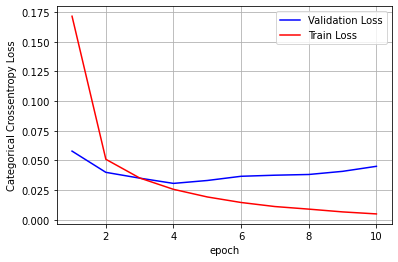

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# 3 Hidden Layers

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 128)       36992     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 64)        73792     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 20, 20, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                128010    
Total params: 257,578
Trainable params: 257,578
Non-trainable params: 0
________________________________________________

In [9]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 613s 10ms/step - loss: 0.1503 - accuracy: 0.9539 - val_loss: 0.0659 - val_accuracy: 0.9804
Epoch 2/10
60000/60000 [==============================] - 615s 10ms/step - loss: 0.0483 - accuracy: 0.9854 - val_loss: 0.0517 - val_accuracy: 0.9855
Epoch 3/10
60000/60000 [==============================] - 620s 10ms/step - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.0348 - val_accuracy: 0.9880
Epoch 4/10
60000/60000 [==============================] - 621s 10ms/step - loss: 0.0245 - accuracy: 0.9927 - val_loss: 0.0373 - val_accuracy: 0.9884
Epoch 5/10
60000/60000 [==============================] - 620s 10ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.0380 - val_accuracy: 0.9893
Epoch 6/10
60000/60000 [==============================] - 613s 10ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0383 - val_accuracy: 0.9887
Epoch 7/10
60000/60000 [==============================] 

Test score: 0.05131749645890795
Test accuracy: 0.9886000156402588


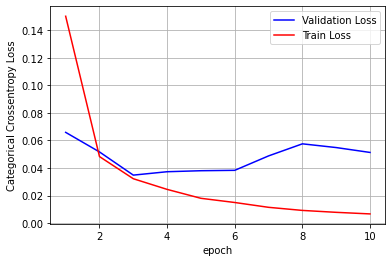

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>Category 2: Kernel_size (5,5) , max_pooling with adding dropout and batch normalization </h3> 

2Hidden Layer

In [11]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 292s 5ms/step - loss: 0.2171 - accuracy: 0.9330 - val_loss: 0.1368 - val_accuracy: 0.9620
Epoch 2/10
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0770 - accuracy: 0.9762 - val_loss: 0.0345 - val_accuracy: 0.9896
Epoch 3/10
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0266 - val_accuracy: 0.9901
Epoch 4/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0257 - val_accuracy: 0.9905
Epoch 5/10
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 0.0261 - val_accuracy: 0.9911
Epoch 6/10
60000/60000 [==============================] - 284s 5ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0251 - val_accuracy: 0.9916
Epoch 7/10
60000/60000 [==============================] - 288s

Test score: 0.017866041018166287
Test accuracy: 0.9937999844551086


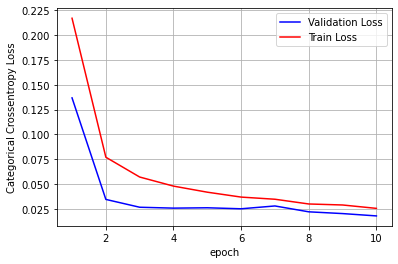

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>Category 3: Kernel_size (2,2) and strides=(2,2),max_pooling, padding = "same" with adding dropout and batch normalization </h3> 

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(2,2),
                 strides=(2,2),
                 padding='same',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 5, 5, 64)          16448     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)         

In [16]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 591us/step - loss: 0.6308 - accuracy: 0.8009 - val_loss: 0.3981 - val_accuracy: 0.9075
Epoch 2/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.2360 - accuracy: 0.9259 - val_loss: 0.0935 - val_accuracy: 0.9713
Epoch 3/10
60000/60000 [==============================] - 36s 598us/step - loss: 0.1894 - accuracy: 0.9406 - val_loss: 0.0794 - val_accuracy: 0.9767
Epoch 4/10
60000/60000 [==============================] - 37s 613us/step - loss: 0.1644 - accuracy: 0.9488 - val_loss: 0.0733 - val_accuracy: 0.9778
Epoch 5/10
60000/60000 [==============================] - 36s 592us/step - loss: 0.1497 - accuracy: 0.9529 - val_loss: 0.0650 - val_accuracy: 0.9792
Epoch 6/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.1416 - accuracy: 0.9562 - val_loss: 0.0707 - val_accuracy: 0.9769
Epoch 7/10
60000/60000 [==============================] 

Test score: 0.05317528839812148
Test accuracy: 0.9839000105857849


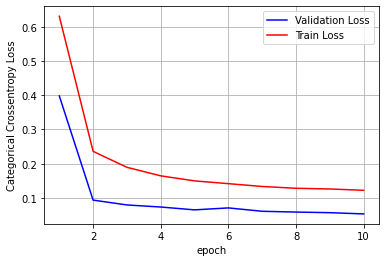

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3>Category 4: Kernel_size (7,7),max_pooling, padding = "valid" with adding dropout and batch normalization </h3> 

In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(7,7),
                 padding='valid',
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 128)       200832    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 8, 8, 128)         512       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 2, 2, 64)          401472    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)         

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 510s 9ms/step - loss: 0.1752 - accuracy: 0.9494 - val_loss: 0.0913 - val_accuracy: 0.9845
Epoch 2/10
60000/60000 [==============================] - 508s 8ms/step - loss: 0.0643 - accuracy: 0.9811 - val_loss: 0.0288 - val_accuracy: 0.9901
Epoch 3/10
60000/60000 [==============================] - 510s 8ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0322 - val_accuracy: 0.9895
Epoch 4/10
60000/60000 [==============================] - 514s 9ms/step - loss: 0.0423 - accuracy: 0.9875 - val_loss: 0.0214 - val_accuracy: 0.9931
Epoch 5/10
60000/60000 [==============================] - 515s 9ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0175 - val_accuracy: 0.9945
Epoch 6/10
60000/60000 [==============================] - 514s 9ms/step - loss: 0.0320 - accuracy: 0.9904 - val_loss: 0.0218 - val_accuracy: 0.9922
Epoch 7/10
60000/60000 [==============================] - 510s

Test score: 0.021513261749742378
Test accuracy: 0.992900013923645


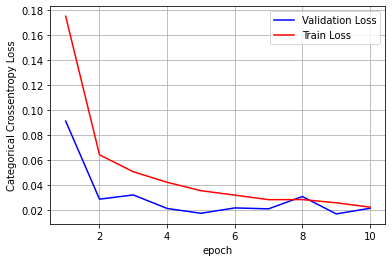

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,epochs+1))
# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))
# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy
# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Display Using PrettyTable

In [26]:
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model","#Hidden Layers","Kernel-Size","MaxPooling","Dropout/BatchNormalization","Optimizer","Activation","Accuracy"] #column headers
x.add_row(["1.","2(128-64)", "3X3","False","False","Adadelta","ReLu","0.989"])
x.add_row(["2.","3(128-64-32)", "3X3","False","False","Adam","ReLu","0.988"])
x.add_row(["3.","2(64-64)", "5X5","2X2","True","Adadelta","ReLu","0.993"])
x.add_row(["4.","2(64-64)", "2X2(s=2,p='same')","2X2","True","Adadelta","ReLu","0.983"])
x.add_row(["5.","2(128-64)", "7X7(s=2,p='valid')","2X2","True","Adam","ReLu","0.992"])
print(x)

+-------+----------------+--------------------+------------+----------------------------+-----------+------------+----------+
| Model | #Hidden Layers |    Kernel-Size     | MaxPooling | Dropout/BatchNormalization | Optimizer | Activation | Accuracy |
+-------+----------------+--------------------+------------+----------------------------+-----------+------------+----------+
|   1.  |   2(128-64)    |        3X3         |   False    |           False            |  Adadelta |    ReLu    |  0.989   |
|   2.  |  3(128-64-32)  |        3X3         |   False    |           False            |    Adam   |    ReLu    |  0.988   |
|   3.  |    2(64-64)    |        5X5         |    2X2     |            True            |  Adadelta |    ReLu    |  0.993   |
|   4.  |    2(64-64)    | 2X2(s=2,p='same')  |    2X2     |            True            |  Adadelta |    ReLu    |  0.983   |
|   5.  |   2(128-64)    | 7X7(s=2,p='valid') |    2X2     |            True            |    Adam   |    ReLu    |  0.